## CO2 Emissions by sector - United States - Time series Forecasting for Power sector 
 
Changes in power-sector emissions were inferred from electricity data from United states. Since different sectors have contributed to the chnage in consumption, we proposed to perform time series forecasting analysis for power sector because time series modeling is a powerful method to describe and extract information from time-based data and help to make informed decisions about future outcomes. 

This notebook explores how to retrieve csv times series dataset, visualizing time series dataset, how to transform dataset into times series, testing if the time series is stationary or not using graphical and Dickey-Fuller test statistic methods, how to transform time series to stationary, how to find optimal parameters to build seasonal Autoregressive Integrated Moving Average (SARIMA) model using grid search method, diagnosing time series prediction, validating the predictive power, forecasting 10 year future CO2 emission from power generation using Power generation data.

We use a public dataset of monthly carbon dioxide emissions from power generation sector for Unoited States from January 1st, 2019 to June 30th, 2020, constructed primarily from near-real-time activity data, results of the international research initiative Carbon Monitor (https://carbonmonitor.org/).These estimates provide a picture of the daily, weekly, and seasonal dynamics of CO2 emissions before and after the COVID-19 pandemic and the economic downturn that it has triggered.

Source help: https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a,
              https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=28089,
              https://www.kaggle.com/hsankesara/time-series-analysis-and-forecasting-using-arima.

### 1)  Import libraries

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

###  2) Time series dataset retrieving and visualization

In [13]:
df_sector = pd.read_excel(r'C:\Users\a687u420\OneDrive - The University of Kansas\KU courses\Fall 2020\Project\Data\Carbon monitor\carbon-monitor-US.xlsx')
df_sector.head(10)

,date,sector,MtCO2
0,01/01/2019,Power,4.197798
1,02/01/2019,Power,5.113159
2,03/01/2019,Power,5.029980
3,04/01/2019,Power,4.946244
4,05/01/2019,Power,4.468191
5,06/01/2019,Power,3.761825
6,07/01/2019,Power,4.300100
7,08/01/2019,Power,4.215780
8,09/01/2019,Power,4.809652
9,10/01/2019,Power,5.307314


In [14]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735 entries, 0 to 2734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2735 non-null   object 
 1   sector  2735 non-null   object 
 2   MtCO2   2735 non-null   float64
dtypes: float64(1), object(2)
memory usage: 64.2+ KB


In [15]:
df_sector.index=pd.to_datetime(df_sector.date,format='%d/%m/%Y')
df_sector = df_sector.set_index('date')
df_sector.index
df_sector.head(10)

,sector,MtCO2
date,,
01/01/2019,Power,4.197798
02/01/2019,Power,5.113159
03/01/2019,Power,5.029980
04/01/2019,Power,4.946244
05/01/2019,Power,4.468191
06/01/2019,Power,3.761825
07/01/2019,Power,4.300100
08/01/2019,Power,4.215780
09/01/2019,Power,4.809652


In [16]:
ts = df_sector[pd.Series(pd.to_datetime(df_sector.index, errors='coerce')).notnull().values]
ts.head(15)

,sector,MtCO2
date,,
01/01/2019,Power,4.197798
02/01/2019,Power,5.113159
03/01/2019,Power,5.029980
04/01/2019,Power,4.946244
05/01/2019,Power,4.468191
06/01/2019,Power,3.761825
07/01/2019,Power,4.300100
08/01/2019,Power,4.215780
09/01/2019,Power,4.809652


In [17]:
ts.dtypes

sector     object
MtCO2     float64
dtype: object

In [18]:
#ss = ts.copy(deep=True)
ts['MtCO2'] = pd.to_numeric(ts['MtCO2'] , errors='coerce')
ts.head(20)

,sector,MtCO2
date,,
01/01/2019,Power,4.197798
02/01/2019,Power,5.113159
03/01/2019,Power,5.029980
04/01/2019,Power,4.946244
05/01/2019,Power,4.468191
06/01/2019,Power,3.761825
07/01/2019,Power,4.300100
08/01/2019,Power,4.215780
09/01/2019,Power,4.809652


In [19]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2735 entries, 01/01/2019 to 30/09/2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sector  2735 non-null   object 
 1   MtCO2   2735 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.1+ KB


In [20]:
ts.dropna(inplace = True)

In [21]:
Energy_sources = ts.groupby('sector')
Energy_sources.head()

,sector,MtCO2
date,,
01/01/2019,Power,4.197798
02/01/2019,Power,5.113159
03/01/2019,Power,5.029980
04/01/2019,Power,4.946244
05/01/2019,Power,4.468191
01/01/2019,Ground Transport,3.898663
02/01/2019,Ground Transport,3.207027
03/01/2019,Ground Transport,4.597128
04/01/2019,Ground Transport,4.844315


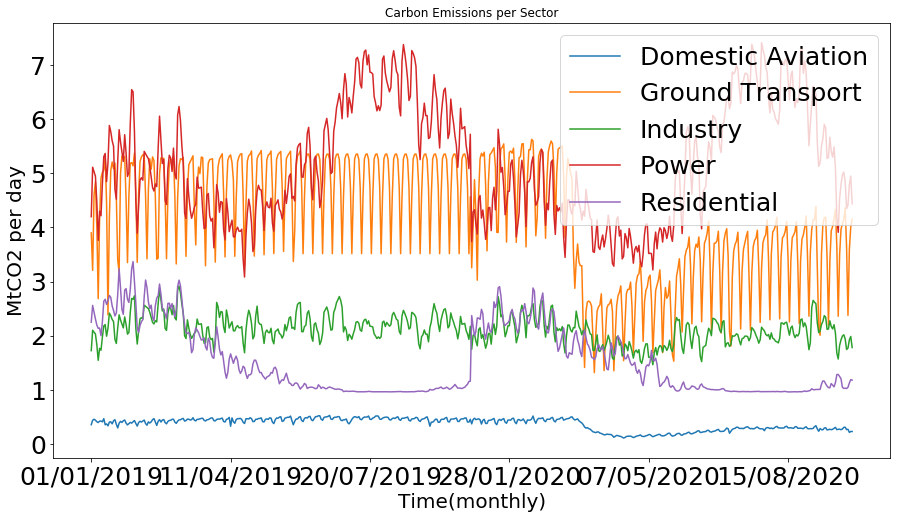

In [22]:
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='MtCO2', label=desc,ax = ax, title='Carbon Emissions per Sector', fontsize = 25)
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2 per day')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 25)

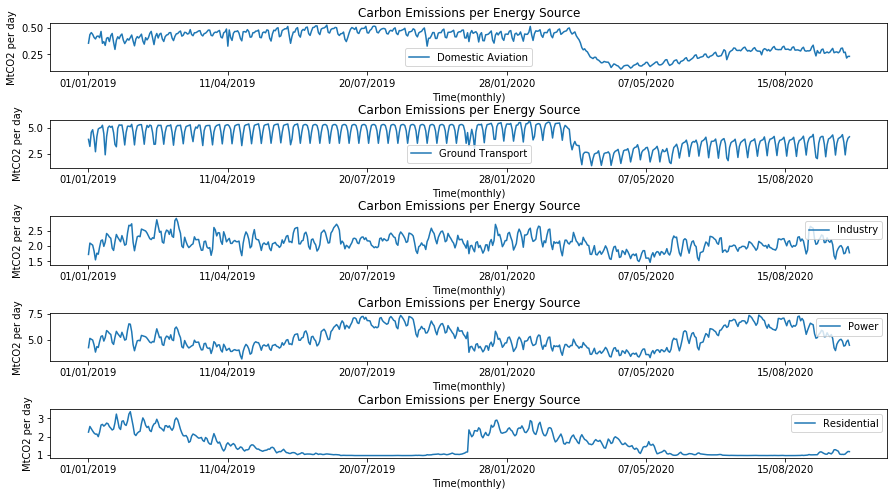

In [23]:
fig, axes = plt.subplots(5,1)
plt.subplots_adjust(hspace=1)
for (desc, group), ax in zip(Energy_sources, axes):
    group.plot(y='MtCO2', ax=ax, label=desc, title='Carbon Emissions per Energy Source')
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2 per day')
plt.show()

In [24]:
ts.head(20)

,sector,MtCO2
date,,
01/01/2019,Power,4.197798
02/01/2019,Power,5.113159
03/01/2019,Power,5.029980
04/01/2019,Power,4.946244
05/01/2019,Power,4.468191
06/01/2019,Power,3.761825
07/01/2019,Power,4.300100
08/01/2019,Power,4.215780
09/01/2019,Power,4.809652


In [25]:
#Particularly selecting the Power sector column for analysis

ts = ts.loc[ts['sector'] == 'Power']
print(ts.shape)

(547, 2)


In [26]:
pe = ts.drop(columns=['sector'])
pe.head(100)

,MtCO2
date,
01/01/2019,4.197798
02/01/2019,5.113159
03/01/2019,5.029980
04/01/2019,4.946244
05/01/2019,4.468191
...,...
06/04/2019,3.955259
07/04/2019,3.769837
08/04/2019,4.531921


In [27]:
pe['MtCO2'].sum() # checking for null values
pe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 01/01/2019 to 30/09/2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MtCO2   547 non-null    float64
dtypes: float64(1)
memory usage: 8.5+ KB


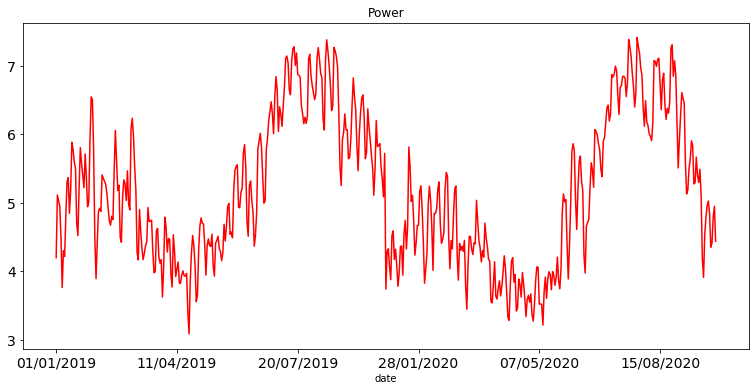

In [53]:
pe.MtCO2.plot(figsize=(13,6), title= 'Power', fontsize=14,color="Red")
plt.show()

### Time series

The first thing we need to do is producing a plot of our time series dataset. From the plot, we will get an idea about the overall trend and seasonality of the series. Then, we will use a statistical method to assess the trend and seasonality of the dataset. After trend and seasonality are assessed if they are present in the dataset, they will be removed from the series to transform the nonstationary dataset into stationary and the residuals are further analyzed.

In [29]:
#Import libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import datetime as dt
from scipy import stats
import math

import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [30]:
# rolling statistics

rolling_mean = pe.rolling(window=30,center=False).mean()
rolling_std = pe.rolling(window=30,center=False).std()

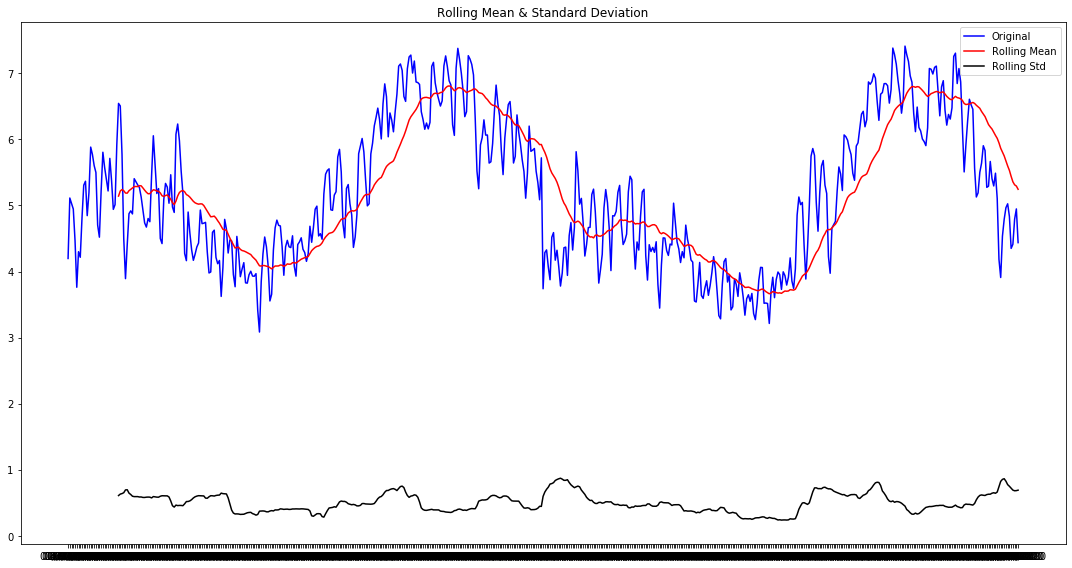

In [31]:
# rolling statistics plot

original = plt.plot(pe, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.tight_layout()
plt.show(block=False)


It mostly looks stationary, however we can improve the timeseries data

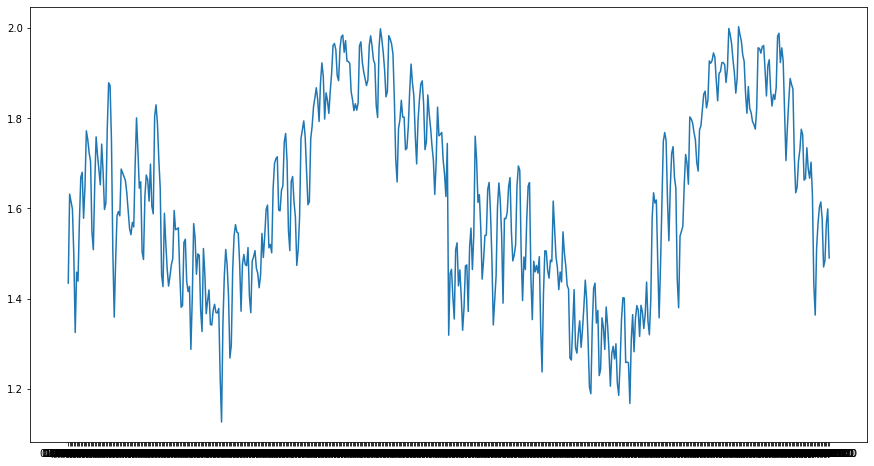

In [32]:
#Estimating Trend

log_Scale = np.log(pe)
plt.plot(log_Scale)

In [33]:
def get_stationarity(timeseries):
    # Dickey–Fuller test:
    result = adfuller(pe['MtCO2'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

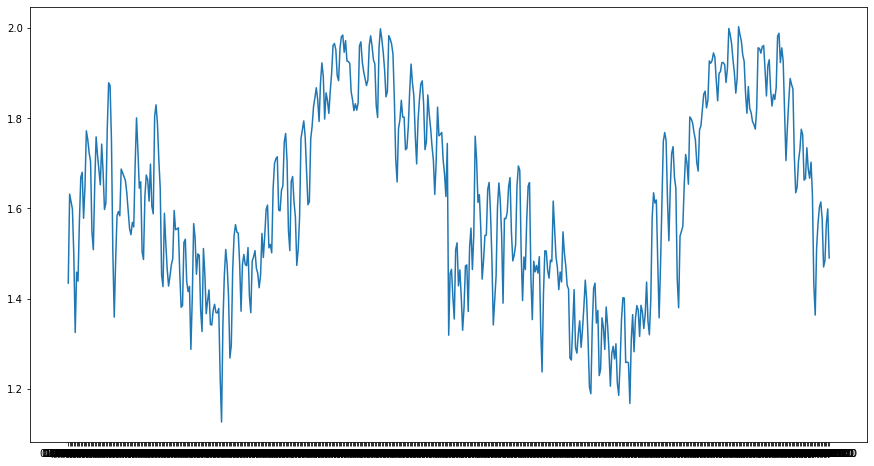

In [34]:
pe_log=np.log(pe)
plt.plot(pe_log)

In [35]:
rolling_mean = pe_log.rolling(window=12).mean()
pe_log_minus_mean = pe_log - rolling_mean
pe_log_minus_mean.dropna(inplace=True)

get_stationarity(pe_log_minus_mean)

ADF Statistic: -1.9801722546905842
p-value: 0.2953339665860151
Critical Values:
	1%: -3.442701754304053
	5%: -2.866988120523906
	10%: -2.5696716542766693


The emissions mean and the variation in standard deviation (black line) clearly vary with time. This shows that the series has a trend. So, it is not a stationary. Also, the Test Statistic is greater than the critical values with 90%, 95% and 99% confidence levels. Hence, no evidence to reject the null hypothesis. Therefore the series is nonstationary.

### Transform the dataset to stationary


### Moving average

In this technique, we take average of ‘k’ consecutive values depending on the frequency of time series (in this case 12 monthes per year). Here, we will take the average over the past 1 year.

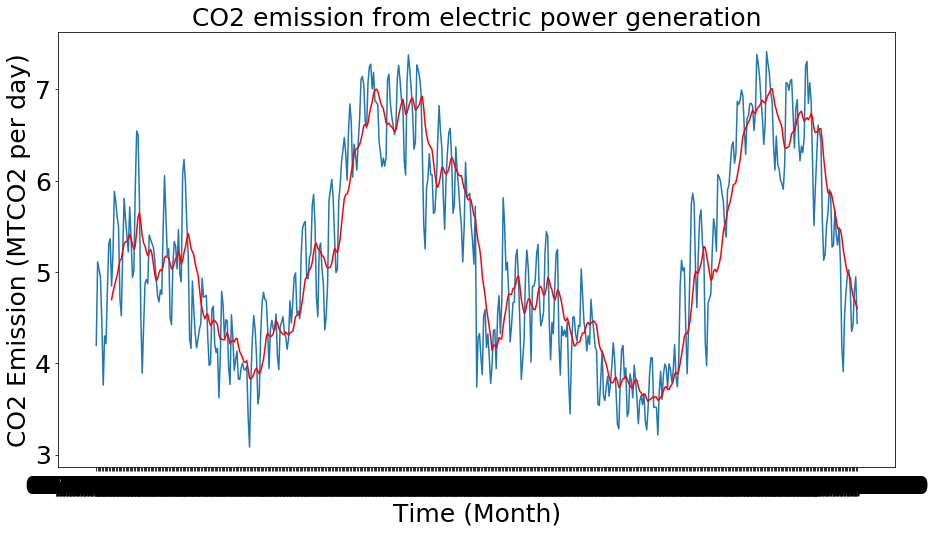

In [55]:
moving_avg = pe.rolling(12).mean()
plt.plot(pe)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (Month)', fontsize = 25)
plt.ylabel('CO2 Emission (MTCO2 per day)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

The red line shows the rolling mean. Subtract the moving average from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [59]:
pe_moving_avg_diff = pe - moving_avg
pe_moving_avg_diff.head(13)

,MtCO2
date,
01/01/2019,NaN
02/01/2019,NaN
03/01/2019,NaN
04/01/2019,NaN
05/01/2019,NaN
06/01/2019,NaN
07/01/2019,NaN
08/01/2019,NaN
09/01/2019,NaN


In [66]:
pe_moving_avg_diff.dropna(inplace=True)
get_stationarity(pe_moving_avg_diff)

ADF Statistic: -1.9801722546905842
p-value: 0.2953339665860151
Critical Values:
	1%: -3.442701754304053
	5%: -2.866988120523906
	10%: -2.5696716542766693


The rolling mean values appear to be varying slightly. The Test Statistic is smaller than the 10% 5%, and 1% of critical values. So, we can say with 99% confidence level that the dataset is a stationary series.

### Find optimal parameters and build SARIMA model

#### Plot the ACF and PACF charts and find the optimal parameters

When looking to fit time series dataset with seasonal ARIMA model, our first goal is to find the values of SARIMA(p,d,q)(P,D,Q)s that optimize our metric of interest. 

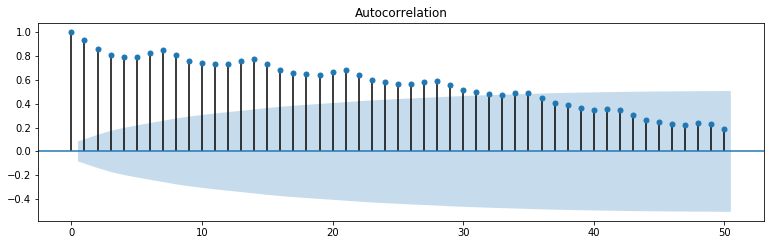

In [36]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

pe1 = pe.values

fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(pe1, lags=50, ax=ax1)

### Grid search

To find the optimal parameters for ARIMA models using the graphical method is not trivial and it is time consuming. We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method. Let's begin by generating the various combination of parameters that we wish to assess

In [37]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [38]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [39]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(pe,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWar

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

In [40]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [41]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(pe,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_QDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3371.4174938994765
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2690.6384024674494
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1251.3118882053277
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1207.643018897377
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1253.1670004618188
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1233.5832109855237
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1209.61543238154
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1208.7185286123433
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2649.821323008666
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2034.582091347429
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:853.9430293343007
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:795.8940308788605
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:855.4148746985834
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:813.3194480035678
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:803.4247813996669
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:796.8691961311404
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:502.476410903708
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:461.147130155667
ARIMA(0

In [42]:
mod = sm.tsa.statespace.SARIMAX(pe, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              MtCO2   No. Observations:                  547
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -247.484
Date:                            Sun, 29 Nov 2020   AIC                            502.968
Time:                                    23:06:29   BIC                            519.983
Sample:                                         0   HQIC                           509.634
                                            - 547                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3631      0.138     -2.634      0.008      -0.633      -0.093
ma.L1          0.5856      0.123   

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. 

When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

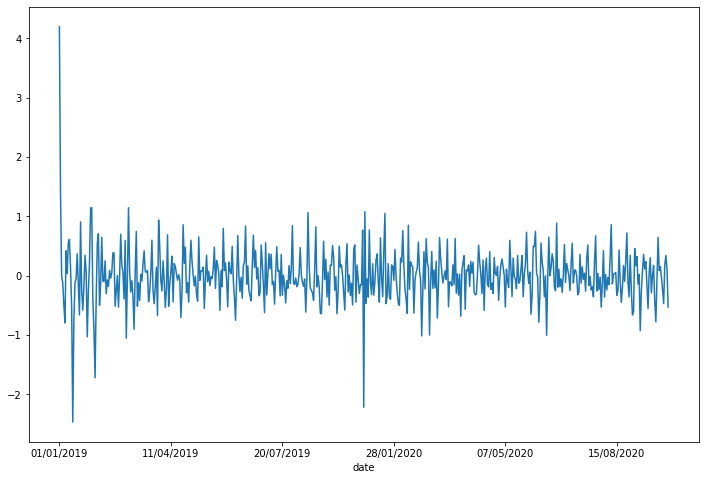

In [43]:
results.resid.plot(figsize=(12,8))

The figure displays the distribution of the residual errors. It shows a little bias in the prediction. Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

In [44]:
print(results.resid.describe())

count    547.000000
mean      -0.001466
std        0.453113
min       -2.464603
25%       -0.249044
50%       -0.008946
75%        0.208136
max        4.197798
dtype: float64


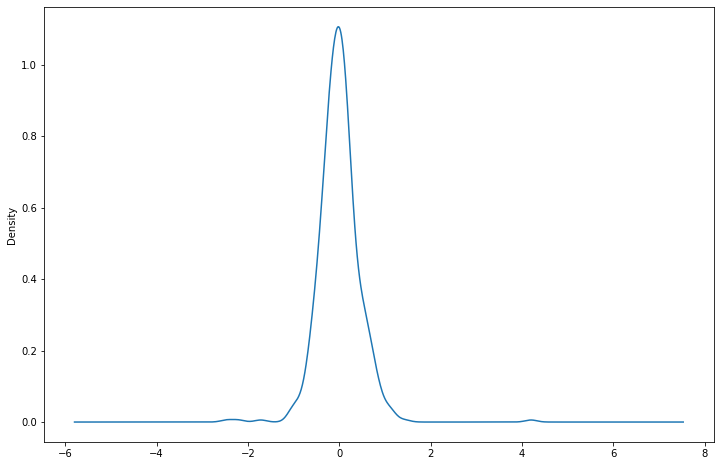

In [45]:
results.resid.plot(figsize=(12,8),kind='kde')

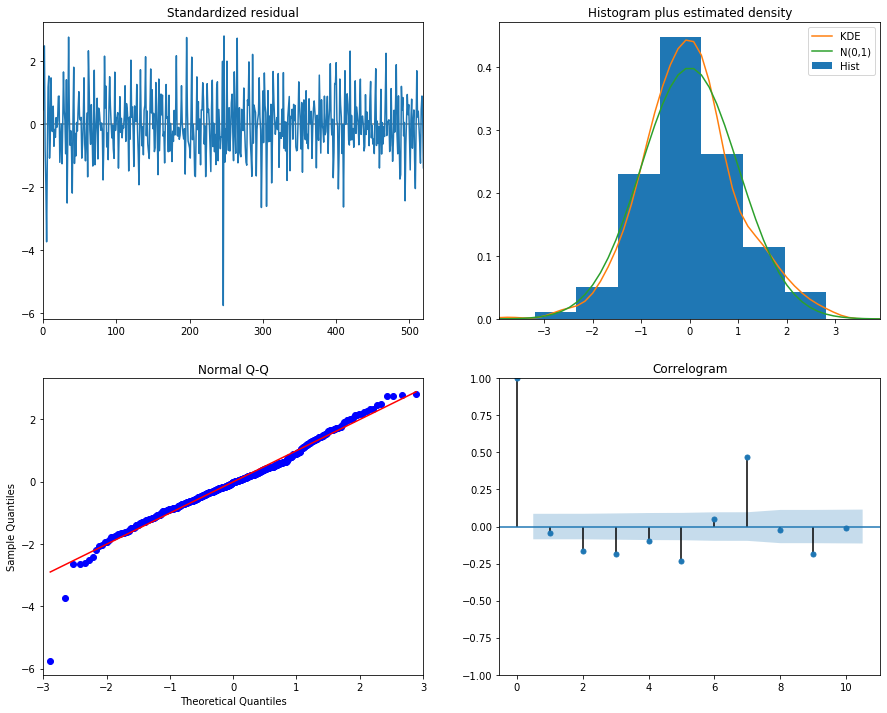

In [46]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved

The model diagnostic suggests that the model residual is normally distributed based on the following:

In the top right plot, the red KDE line follows closely with the N(0,1) line which is a good indication that the residuals are normally distributed. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.
The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

### Validating prediction

We have obtained a model for our time series that can now be used to produce forecasts. We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecast.

In [47]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower MtCO2,upper MtCO2
date,,
26/07/2020,5.633210,7.125117
27/07/2020,5.994309,7.486057
28/07/2020,6.794868,8.286413
29/07/2020,6.395805,7.887282
30/07/2020,6.447817,7.939269


The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

### Forecasting

In [48]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower MtCO2,upper MtCO2
547,3.517518,5.006936
548,3.074133,5.426476
549,2.747344,5.649931
550,2.548901,5.935196
551,2.388920,6.190747


We can use the output of this code to plot the time series and forecasts of its future values.

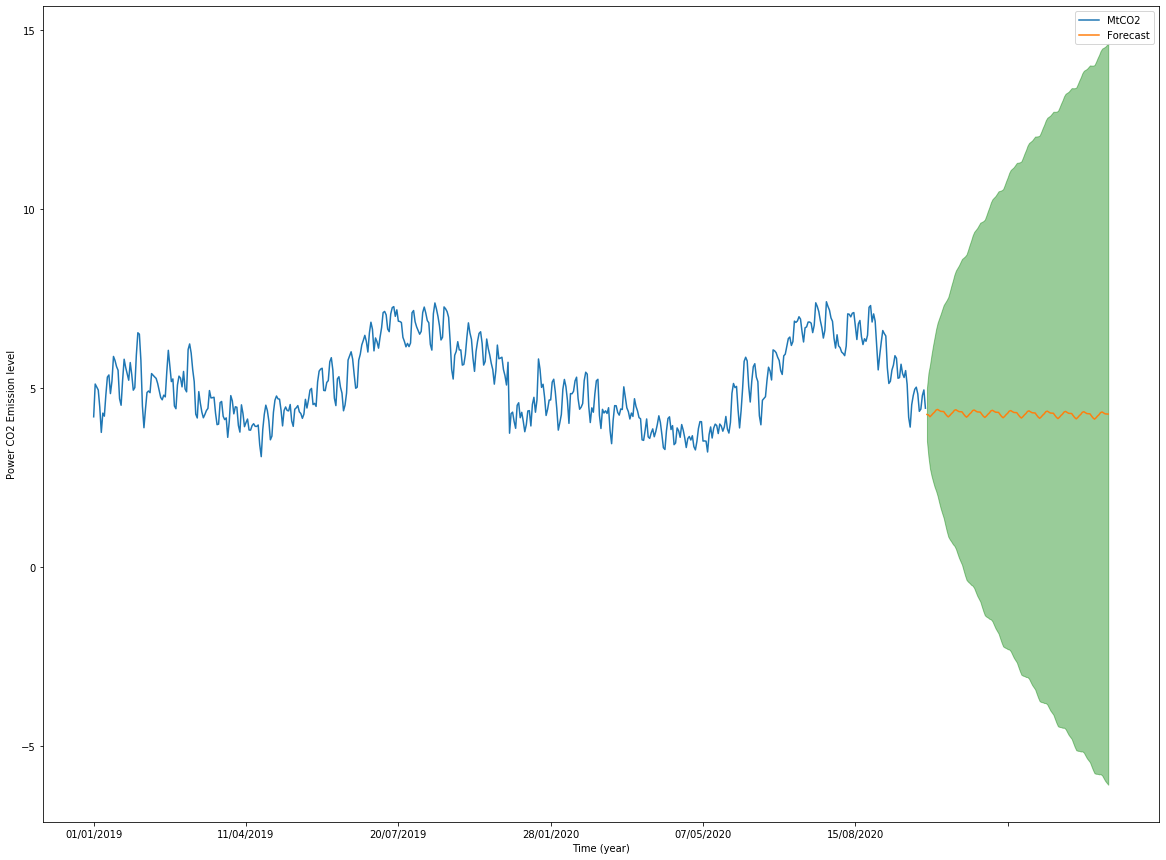

In [49]:
ax = pe.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Power CO2 Emission level')

plt.legend()
plt.show()

Both the forecast and associated confidence interval that we have generated can now be used to further explore and understand the time series. The forecast shows that the CO2 emission from power generation is expected to show a flat trend suggesting that power generatuion may not be major contributor to CO2 emissions, and an altenrative sectors should be tested in this regards to forecast their behavior. 

Most changes observed in 2020 are likely to be temporary as they do not reflect structural changes in the economic, transport or energy systems. The social trauma of confinement and associated changes could alter the future trajectory in unpredictable ways, but social responses alone, as shown here, would not drive the deep and sustained reductions needed to reach net-zero emissions. However, the extent to which world leaders consider the net-zero emissions targets and the imperatives of climate change when planning their economic responses to COVID-19 is likely to influence the pathway of CO2 emissions for decades to come.